In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Import Data

In [2]:
DATA_PATH = '../Capital IQ - Key Development/KeyDev_top25_11Jun2024_1546.csv'

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,enterdate,entertime,entereddateutc,lastmodifieddate,lastmodifieddateutc,mostimportantdateutc,speffectivedate,sptodate,gvkey,sourcetypename
0,1009023,19007,Baker Hughes Holdings LLC,"Baker Hughes Incorporated, Q4 2004 Earnings Ca...",48,Earnings Calls,1,Target,2005-01-04,12:00:00 AM,...,2005-01-05,1:28:00 PM,05JAN2005:18:28:00.000000,01JUL2017:04:07:00.000000,01JUL2017:08:07:00.000000,17FEB2005:13:30:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire
1,64165523,19007,Baker Hughes Holdings LLC,"Baker Hughes Inc. to Report Q4, 2004 Results o...",55,Earnings Release Date,1,Target,2005-01-04,12:00:00 AM,...,2005-01-05,7:55:00 AM,05JAN2005:12:55:00.000000,30JUN2017:18:33:00.000000,30JUN2017:22:33:00.000000,17FEB2005:14:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire
2,1339923,19007,Baker Hughes Holdings LLC,Baker Hughes Announces January 2005 Rig Counts,41,Product-Related Announcements,1,Target,2005-02-07,12:00:00 AM,...,2005-02-07,6:41:00 PM,07FEB2005:23:41:00.000000,24DEC2016:11:42:00.000000,24DEC2016:16:42:00.000000,07FEB2005:00:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire
3,1373353,19007,Baker Hughes Holdings LLC,Baker Hughes Provides Outlook for the First Qu...,29,Corporate Guidance - New/Confirmed,1,Target,2005-02-17,12:00:00 AM,...,2005-03-02,12:49:00 PM,02MAR2005:17:49:00.000000,24DEC2016:12:24:00.000000,24DEC2016:17:24:00.000000,17FEB2005:00:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire
4,1360179,19007,Baker Hughes Holdings LLC,Baker Hughes Inc. Reports Earnings Results for...,28,Announcements of Earnings,1,Target,2005-02-18,12:00:00 AM,...,2005-02-21,11:52:00 AM,21FEB2005:16:52:00.000000,12OCT2017:01:05:00.000000,12OCT2017:05:05:00.000000,18FEB2005:00:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,Other


In [4]:
df['companyid'].nunique()

25

## Clean Data

In [5]:
df.isna().sum()

keydevid                        0
companyid                       0
companyname                     0
headline                        0
keydeveventtypeid               0
eventtype                       0
keydevtoobjectroletypeid        0
objectroletype                  0
announcedate                    0
announcetime                    0
announcedateTimeZone            0
announceddateutc                0
enterdate                       0
entertime                       0
entereddateutc                  0
lastmodifieddate                0
lastmodifieddateutc             0
mostimportantdateutc            0
speffectivedate                 0
sptodate                    24082
gvkey                           0
sourcetypename                  0
dtype: int64

## Map Headline to target

In [6]:
## Calulate the following next Friday identifying the target period
df['announcedate'] = pd.to_datetime(df['announcedate'])
df['fri_of_week'] = df['announcedate'].dt.to_period('W-FRI').apply(lambda r: r.end_time).dt.date

## next_fri_of_week is the week for the target
df['next_fri_of_week'] = df['fri_of_week'] + timedelta(days=7)
df.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,entereddateutc,lastmodifieddate,lastmodifieddateutc,mostimportantdateutc,speffectivedate,sptodate,gvkey,sourcetypename,fri_of_week,next_fri_of_week
0,1009023,19007,Baker Hughes Holdings LLC,"Baker Hughes Incorporated, Q4 2004 Earnings Ca...",48,Earnings Calls,1,Target,2005-01-04,12:00:00 AM,...,05JAN2005:18:28:00.000000,01JUL2017:04:07:00.000000,01JUL2017:08:07:00.000000,17FEB2005:13:30:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire,2005-01-07,2005-01-14
1,64165523,19007,Baker Hughes Holdings LLC,"Baker Hughes Inc. to Report Q4, 2004 Results o...",55,Earnings Release Date,1,Target,2005-01-04,12:00:00 AM,...,05JAN2005:12:55:00.000000,30JUN2017:18:33:00.000000,30JUN2017:22:33:00.000000,17FEB2005:14:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire,2005-01-07,2005-01-14
2,1339923,19007,Baker Hughes Holdings LLC,Baker Hughes Announces January 2005 Rig Counts,41,Product-Related Announcements,1,Target,2005-02-07,12:00:00 AM,...,07FEB2005:23:41:00.000000,24DEC2016:11:42:00.000000,24DEC2016:16:42:00.000000,07FEB2005:00:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire,2005-02-11,2005-02-18
3,1373353,19007,Baker Hughes Holdings LLC,Baker Hughes Provides Outlook for the First Qu...,29,Corporate Guidance - New/Confirmed,1,Target,2005-02-17,12:00:00 AM,...,02MAR2005:17:49:00.000000,24DEC2016:12:24:00.000000,24DEC2016:17:24:00.000000,17FEB2005:00:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,PR Newswire,2005-02-18,2005-02-25
4,1360179,19007,Baker Hughes Holdings LLC,Baker Hughes Inc. Reports Earnings Results for...,28,Announcements of Earnings,1,Target,2005-02-18,12:00:00 AM,...,21FEB2005:16:52:00.000000,12OCT2017:01:05:00.000000,12OCT2017:05:05:00.000000,18FEB2005:00:00:00.000000,14APR2018:12:08:00.000000,NaN,1976,Other,2005-02-18,2005-02-25


In [7]:
## Load mapping between crsp and key dev data
mapper_df = pd.read_csv('../Capital IQ - Key Development/mergeTable_top25_11Jun2024_1546.csv')
mapper_df = mapper_df[['GVKEY', 'LPERMCO']].drop_duplicates()
mapper_df = mapper_df.rename(columns={'GVKEY': 'gvkey', 'LPERMCO': 'PERMCO'})
mapper_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_23516\3367619484.py:2: DtypeWarning: Columns (11,18,21,24,26,45,52,60,71,72,77,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  mapper_df = pd.read_csv('../Capital IQ - Key Development/mergeTable_top25_11Jun2024_1546.csv')


,gvkey,PERMCO
0,1380,20064
2769,1976,20253
5538,2410,20333
8307,2991,20440
11076,4503,20678


In [8]:
## Add mapper to key dev data
mapper_df['gvkey'] = mapper_df['gvkey'].astype(int).astype(str)
df['gvkey'] = df['gvkey'].astype(int).astype(str)

df = pd.merge(df, mapper_df[['gvkey', 'PERMCO']], on='gvkey', how='inner')

In [9]:
## Check the number of unique PERMCO
df['PERMCO'].nunique()

25

## Load target data

In [10]:
target_path = 'exam_period_v6_preprocessed_top25_14Jun24.csv'

target_df = pd.read_csv(target_path)
target_df.head()

,PERMCO,fri_of_week,sum_log_RET_plus1,TICKER,COMNAM,weekly_return,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,moving_prc_dir,market_cap
0,2381,2005-01-14,0.004351,ENB,ENBRIDGE INC,0.436058,1,-3.254320,3.690378,1,12.0925,12.0400,0.0525,1,2.261126e+07
1,2381,2005-01-21,0.013756,ENB,ENBRIDGE INC,1.385143,1,0.436058,0.949086,1,12.2600,12.0925,0.1675,1,2.261126e+07
2,2381,2005-01-28,0.028941,ENB,ENBRIDGE INC,2.936365,1,1.385143,1.551221,1,12.6200,12.2600,0.3600,1,2.261126e+07
3,2381,2005-02-04,0.015140,ENB,ENBRIDGE INC,1.525478,1,2.936365,-1.410887,0,12.8125,12.6200,0.1925,1,2.261126e+07
4,2381,2005-02-11,0.003782,ENB,ENBRIDGE INC,0.378910,1,1.525478,-1.146567,0,12.7600,12.8125,-0.0525,0,2.261126e+07


In [11]:
## Map target data and key dev
df['next_fri_of_week'] = df['next_fri_of_week'].astype(str)
target_df['fri_of_week'] = target_df['fri_of_week'].astype(str)

## the next_fri_of_week from key dev must be the same as fri_of_week from crsp
df = pd.merge(df, target_df, left_on=['PERMCO', 'next_fri_of_week'], 
              right_on=['PERMCO', 'fri_of_week'], how='right')
df['headline'] = df['headline'].fillna('No_Headlines')
df = df.drop_duplicates()

In [12]:
df[df['headline']=='No_Headlines'].shape

(5350, 39)

In [13]:
## Check example of the data
df.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,weekly_return,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,moving_prc_dir,market_cap
0,2182611.0,280420.0,Enbridge Inc.,Closed Merger/Acquisition Transaction - Target...,81.0,M&A Transaction Closings,3.0,Buyer,2005-01-06,12:00:00 AM,...,0.436058,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07
1,1010341.0,280420.0,Enbridge Inc.,"Enbridge Inc., 2004 Earnings Call, Jan-26-2005",48.0,Earnings Calls,1.0,Target,2005-01-07,12:00:00 AM,...,0.436058,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07
2,64164497.0,280420.0,Enbridge Inc.,"Enbridge Inc. to Report Q2, 2005 Results on Ju...",55.0,Earnings Release Date,1.0,Target,2005-01-07,12:00:00 AM,...,0.436058,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07
3,64309666.0,280420.0,Enbridge Inc.,"Enbridge Inc. to Report Q3, 2005 Results on No...",55.0,Earnings Release Date,1.0,Target,2005-01-07,12:00:00 AM,...,0.436058,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07
4,64369117.0,280420.0,Enbridge Inc.,"Enbridge Inc. to Report Q1, 2005 Results on Ma...",55.0,Earnings Release Date,1.0,Target,2005-01-07,12:00:00 AM,...,0.436058,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07


In [14]:
## Check if if labeled fri_of_week is correct
df[['next_fri_of_week', 'fri_of_week_x', 'fri_of_week_y']].drop_duplicates()

,next_fri_of_week,fri_of_week_x,fri_of_week_y
0,2005-01-14,2005-01-07,2005-01-14
5,2005-01-21,2005-01-14,2005-01-21
6,NaN,NaN,2005-01-28
7,NaN,NaN,2005-02-04
8,2005-02-11,2005-02-04,2005-02-11
...,...,...,...
18929,NaN,NaN,2014-02-07
20562,NaN,NaN,2014-03-28
23312,NaN,NaN,2013-10-18
23797,NaN,NaN,2009-01-30


In [18]:
df.groupby('PERMCO')['fri_of_week_y'].nunique().reset_index().groupby('fri_of_week_y').count()

,PERMCO
fri_of_week_y,
572,25


# Data Formatting

In [19]:
df2 = df.copy()

In [20]:
## calulate the monday of week
df2['mon_of_week'] = pd.to_datetime(df2['fri_of_week_y']) + timedelta(days=-4)
df2[['mon_of_week', 'fri_of_week_y']].drop_duplicates()

,mon_of_week,fri_of_week_y
0,2005-01-10,2005-01-14
5,2005-01-17,2005-01-21
6,2005-01-24,2005-01-28
7,2005-01-31,2005-02-04
8,2005-02-07,2005-02-11
...,...,...
1001,2015-11-23,2015-11-27
1003,2015-11-30,2015-12-04
1006,2015-12-07,2015-12-11
1010,2015-12-14,2015-12-18


In [21]:
## Get the Week number of each stock
tmp = df2[['PERMCO', 'fri_of_week_y']].drop_duplicates()
tmp = tmp.sort_values(['PERMCO', 'fri_of_week_y'])

tmp['Week'] = tmp.groupby('PERMCO').cumcount() + 1
tmp.head()

,PERMCO,fri_of_week_y,Week
0,2381,2005-01-14,1
5,2381,2005-01-21,2
6,2381,2005-01-28,3
7,2381,2005-02-04,4
8,2381,2005-02-11,5


In [22]:
df2 = pd.merge(df2, tmp, on=['PERMCO', 'fri_of_week_y'], how='inner')
df2.head()

,keydevid,companyid,companyname,headline,keydeveventtypeid,eventtype,keydevtoobjectroletypeid,objectroletype,announcedate,announcetime,...,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,moving_prc_dir,market_cap,mon_of_week,Week
0,2182611.0,280420.0,Enbridge Inc.,Closed Merger/Acquisition Transaction - Target...,81.0,M&A Transaction Closings,3.0,Buyer,2005-01-06,12:00:00 AM,...,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07,2005-01-10,1
1,1010341.0,280420.0,Enbridge Inc.,"Enbridge Inc., 2004 Earnings Call, Jan-26-2005",48.0,Earnings Calls,1.0,Target,2005-01-07,12:00:00 AM,...,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07,2005-01-10,1
2,64164497.0,280420.0,Enbridge Inc.,"Enbridge Inc. to Report Q2, 2005 Results on Ju...",55.0,Earnings Release Date,1.0,Target,2005-01-07,12:00:00 AM,...,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07,2005-01-10,1
3,64309666.0,280420.0,Enbridge Inc.,"Enbridge Inc. to Report Q3, 2005 Results on No...",55.0,Earnings Release Date,1.0,Target,2005-01-07,12:00:00 AM,...,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07,2005-01-10,1
4,64369117.0,280420.0,Enbridge Inc.,"Enbridge Inc. to Report Q1, 2005 Results on Ma...",55.0,Earnings Release Date,1.0,Target,2005-01-07,12:00:00 AM,...,-3.25432,3.690378,1,12.0925,12.04,0.0525,1,2.261126e+07,2005-01-10,1


In [23]:
df2.columns

Index(['keydevid', 'companyid', 'companyname', 'headline', 'keydeveventtypeid',
       'eventtype', 'keydevtoobjectroletypeid', 'objectroletype',
       'announcedate', 'announcetime', 'announcedateTimeZone',
       'announceddateutc', 'enterdate', 'entertime', 'entereddateutc',
       'lastmodifieddate', 'lastmodifieddateutc', 'mostimportantdateutc',
       'speffectivedate', 'sptodate', 'gvkey', 'sourcetypename',
       'fri_of_week_x', 'next_fri_of_week', 'PERMCO', 'fri_of_week_y',
       'sum_log_RET_plus1', 'TICKER', 'COMNAM', 'weekly_return',
       'weekly_return_sign', 'previous_weekly_return', 'moving_return',
       'moving_return_dir', 'eow_adjusted_prc', 'previous_eom_adjusted_prc',
       'moving_prc', 'moving_prc_dir', 'market_cap', 'mon_of_week', 'Week'],
      dtype='object')

In [24]:
format_cols = ['Week', 'From', 'To', 'Return', 'moving_prc_dir', 'Text', 'TICKER',
                'keydevid', 'companyid', 'companyname', 'keydeveventtypeid',
                'eventtype', 'keydevtoobjectroletypeid', 'objectroletype',
                'announcedate', 'announcetime', 'announcedateTimeZone',
                'announceddateutc', 'enterdate', 'entertime', 'entereddateutc',
                'lastmodifieddate', 'lastmodifieddateutc', 'mostimportantdateutc',
                'speffectivedate', 'sptodate', 'gvkey', 'sourcetypename',
                'fri_of_week_x', 'next_fri_of_week', 'PERMCO', 'TICKER', 'COMNAM', 'sum_log_RET_plus1',
                'weekly_return_sign', 'previous_weekly_return', 'moving_return',
                'moving_return_dir', 'eow_adjusted_prc', 'previous_eom_adjusted_prc',
                'moving_prc', 'market_cap']

rename_dict = {'mon_of_week': 'From', 'fri_of_week_y': 'To', 'weekly_return': 'Return', 'headline': 'Text'}
df3 = df2.rename(columns=rename_dict)
df3 = df3[format_cols]
df3.head()

,Week,From,To,Return,moving_prc_dir,Text,TICKER,keydevid,companyid,companyname,...,COMNAM,sum_log_RET_plus1,weekly_return_sign,previous_weekly_return,moving_return,moving_return_dir,eow_adjusted_prc,previous_eom_adjusted_prc,moving_prc,market_cap
0,1,2005-01-10,2005-01-14,0.436058,1,Closed Merger/Acquisition Transaction - Target...,ENB,2182611.0,280420.0,Enbridge Inc.,...,ENBRIDGE INC,0.004351,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,2.261126e+07
1,1,2005-01-10,2005-01-14,0.436058,1,"Enbridge Inc., 2004 Earnings Call, Jan-26-2005",ENB,1010341.0,280420.0,Enbridge Inc.,...,ENBRIDGE INC,0.004351,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,2.261126e+07
2,1,2005-01-10,2005-01-14,0.436058,1,"Enbridge Inc. to Report Q2, 2005 Results on Ju...",ENB,64164497.0,280420.0,Enbridge Inc.,...,ENBRIDGE INC,0.004351,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,2.261126e+07
3,1,2005-01-10,2005-01-14,0.436058,1,"Enbridge Inc. to Report Q3, 2005 Results on No...",ENB,64309666.0,280420.0,Enbridge Inc.,...,ENBRIDGE INC,0.004351,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,2.261126e+07
4,1,2005-01-10,2005-01-14,0.436058,1,"Enbridge Inc. to Report Q1, 2005 Results on Ma...",ENB,64369117.0,280420.0,Enbridge Inc.,...,ENBRIDGE INC,0.004351,1,-3.25432,3.690378,1,12.0925,12.04,0.0525,2.261126e+07


In [25]:
## Check the number of unique PERMCO
df3['PERMCO'].nunique()

25

In [35]:
df3 = df3.drop_duplicates(subset=['Week', 'PERMCO', 'Text'])

In [37]:
print(df3.shape, df3.drop_duplicates(subset=['Week', 'PERMCO', 'Text']).shape)

(28113, 42) (28113, 42)


''

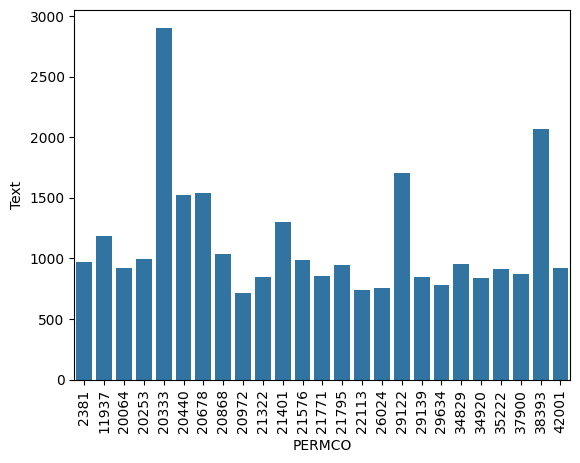

In [38]:
sns.barplot(df3.groupby('PERMCO')['Text'].count().reset_index().sort_values(by=['Text'], ascending=False), 
            x='PERMCO', y='Text')
plt.xticks(rotation=90)
;

In [39]:
df3.shape

(28113, 42)

In [40]:
# df3.to_csv('./combined_data_preprocessed_top25_12May24_1403.csv', index=False)
df3.to_csv('./combined_data_preprocessed_top25_14Jun24.csv', index=False)